# TEST JUPYTER

In [21]:
import requests
import json
import re

-------------------------

# GET

In [4]:
# all content
url="http://localhost:8080/"
requests.get(url).json()[0]

{'_id': {'$oid': '5de4e7ca23b10dd6da183ddb'},
 'idUser': 0,
 'userName': 'John Wick',
 'idMessage': 0,
 'idChat': 0,
 'datetime': '2019-10-17 10:15:41',
 'text': 'Hey Mike, whats up??'}

In [6]:
# all messages
url='http://localhost:8080/messages/'
requests.get(url).json()[0]

{'text': 'Hey Mike, whats up??'}

In [7]:
# all conversations
url='http://localhost:8080/chatid/'
chatid=requests.get(url).json()

In [4]:
# all sentiments analysis. crazy stuff from before
url='http://localhost:8080/chat/2/sentiment/'
chatid=requests.get(url)
chatid.json()
chatid
my_dict = {}
for x in chatid:    
    if 'idChat' in x:
        if x['idChat'] not in my_dict:
            my_dict[x['idChat']] = x['text']
        else:
            my_dict[x['idChat']] += " {}".format(x['text'])
list_conversation=my_dict[0]

import nltk # install nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()
sid.polarity_scores(list_conversation)

In [3]:
####################################################3

In [1]:
import requests
import json

In [2]:
# recommending series
url='http://localhost:8080/users'
for_analysis=requests.get(url).json()

In [3]:
#chatid

In [4]:
for_analysis[0]
for_analysis[0]["userName"]
for_analysis[0]["text"]

'Hey Mike, whats up??'

In [22]:
def getting_every_sentence(lista):
    users_dict=dict()
    for i in range(len(lista)):
        if lista[i]['userName'] not in users_dict:
            users_dict[lista[i]['userName']]=lista[i]['text']
        else:
            users_dict[lista[i]['userName']]+=' ' +lista[i]['text']
    for e in users_dict:
        users_dict[e]=re.sub(r"[^a-zA-Z0-9]+", ' ', users_dict[e])
    return users_dict

In [25]:
to_analyse=getting_every_sentence(for_analysis)
to_analyse.values()

dict_values(['Hey Mike whats up No had to work How was it No way I bet people went crazy Motherfucker Hungover Sure boss I do I just dont feel appreciated in my job I dunno Maybe Thank you boss I feel much better ', 'Dude Did you watch the game last night Awesome Boyander scored 3 goals Way For sure We stayed at KuboLoco until 6AM Dead burried and still suffering Sweety pie How Ive longed to talk to you Its Mike honey bunny Or doctor LOVE And youre a sick little girl Cant handle me on your own That would be hot I NEED VODKA LIKE A CAR NEEDS GAS', 'Im so angry right now Impossible Cant do it Just cant He pissed me off so much But how am I suposed to fix the facial recognition system if it doesnt even work And who the hell is Tony Oh shit I think youre friends with my brother ', 'I saw you this morning You shouldnt get so upset Dont get so frustrated Leia Remember what German said Im sure you will find a way I am Iron Man Uh Oh Better fix that quickly ', 'Not again Michael Im gonna repor

In [24]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

In [26]:
# Create the Document Term Matrix
#count_vectorizer = CountVectorizer(stop_words='english')
count_vectorizer = CountVectorizer()
sparse_matrix = count_vectorizer.fit_transform(to_analyse.values())
sparse_matrix

<9x219 sparse matrix of type '<class 'numpy.int64'>'
	with 290 stored elements in Compressed Sparse Row format>

In [28]:
# NOTE: It will be sooo much better to relate similarity meaning words
# See gensim -> https://radimrehurek.com/gensim/

# Convert Sparse Matrix to Pandas Dataframe if you want to see the word frequencies.
doc_term_matrix = sparse_matrix.todense()
df = pd.DataFrame(doc_term_matrix, 
                  columns=count_vectorizer.get_feature_names(), 
                  index=to_analyse.keys())

In [29]:
from sklearn.metrics.pairwise import cosine_similarity as distance
#from sklearn.metrics.pairwise import euclidean_distances as distance

# Compute Cosine Similarity matrix (or selected distance)
similarity_matrix = distance(df, df)
print(similarity_matrix)

[[1.         0.14686936 0.18677184 0.1627907  0.08993875 0.09113533
  0.02577696 0.13953488 0.12227087]
 [0.14686936 1.         0.18020684 0.16522803 0.12424948 0.20144406
  0.06104677 0.1835867  0.12869789]
 [0.18677184 0.18020684 1.         0.16601942 0.10032154 0.14638501
  0.06900656 0.06225728 0.        ]
 [0.1627907  0.16522803 0.16601942 1.         0.11242344 0.12758946
  0.02577696 0.13953488 0.24454174]
 [0.08993875 0.12424948 0.10032154 0.11242344 1.         0.24671758
  0.04984448 0.08993875 0.11821656]
 [0.09113533 0.20144406 0.14638501 0.12758946 0.24671758 1.
  0.0808122  0.07290826 0.12777531]
 [0.02577696 0.06104677 0.06900656 0.02577696 0.04984448 0.0808122
  1.         0.12888482 0.        ]
 [0.13953488 0.1835867  0.06225728 0.13953488 0.08993875 0.07290826
  0.12888482 1.         0.08151391]
 [0.12227087 0.12869789 0.         0.24454174 0.11821656 0.12777531
  0.         0.08151391 1.        ]]


,John Wick,Mike Wazowski,Leia Organa,Tony Stark,Ellen Ripley,J. Jonah Jameson,Danny Torrances Finger,Danny Torrance,Celia
John Wick,1.000000,0.146869,0.186772,0.162791,0.089939,0.091135,0.025777,0.139535,0.122271
Mike Wazowski,0.146869,1.000000,0.180207,0.165228,0.124249,0.201444,0.061047,0.183587,0.128698
Leia Organa,0.186772,0.180207,1.000000,0.166019,0.100322,0.146385,0.069007,0.062257,0.000000
Tony Stark,0.162791,0.165228,0.166019,1.000000,0.112423,0.127589,0.025777,0.139535,0.244542
Ellen Ripley,0.089939,0.124249,0.100322,0.112423,1.000000,0.246718,0.049844,0.089939,0.118217
J. Jonah Jameson,0.091135,0.201444,0.146385,0.127589,0.246718,1.000000,0.080812,0.072908,0.127775
Danny Torrances Finger,0.025777,0.061047,0.069007,0.025777,0.049844,0.080812,1.000000,0.128885,0.000000
Danny Torrance,0.139535,0.183587,0.062257,0.139535,0.089939,0.072908,0.128885,1.000000,0.081514
Celia,0.122271,0.128698,0.000000,0.244542,0.118217,0.127775,0.000000,0.081514,1.000000


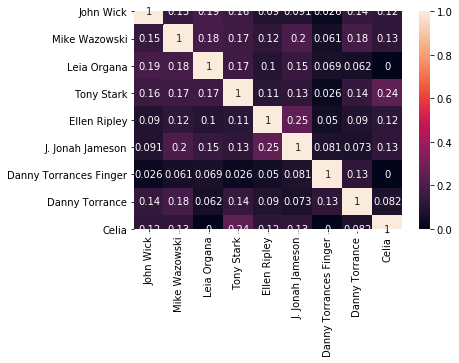

In [31]:
# Convert it to dataframe to visualize with seaborn
import seaborn as sns
sim_df = pd.DataFrame(similarity_matrix, columns=to_analyse.keys(), index=to_analyse.keys())
display(sim_df)
sns.heatmap(sim_df,annot=True)

In [17]:
import nltk # install nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [18]:
sid = SentimentIntensityAnalyzer()
conversations=[]
sentiment=[]
for x,y in my_dict.items():
    sentiment.append(str(y))
    
sid.polarity_scores(sentiment)

LookupError: 
**********************************************************************
  Resource [93mvader_lexicon[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('vader_lexicon')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93msentiment/vader_lexicon.zip/vader_lexicon/vader_lexicon.txt[0m

  Searched in:
    - '/home/vargas/nltk_data'
    - '/home/vargas/miniconda3/envs/ironhack/nltk_data'
    - '/home/vargas/miniconda3/envs/ironhack/share/nltk_data'
    - '/home/vargas/miniconda3/envs/ironhack/lib/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/local/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/local/lib/nltk_data'
    - ''
**********************************************************************


# POST

In [10]:
url="http://localhost:8080/user/create"
params={"name":"Josepe"}
requests.post(url, data=params)

<Response [200]>

In [2]:
url="http://localhost:8080/create_all"
params={"name":"Celia", "text":"Ey Vargas! You should grow up, you damn piece of physicist, Yay!"}
requests.post(url, data=params)

<Response [200]>